In [16]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [17]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [18]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [19]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [ ]:
Base = automap_base()

Base.prepare(engine, reflect=True)

In [22]:
Base.classes.keys()

['station', 'measurement']

In [54]:
measurement = Base.classes.measurement
station = Base.classes.station

In [55]:
session = Session(engine)

# Exploratory Precipitation Analysis

In [56]:
most_recent_date = session.query(func.max(measurement.date)).scalar()

most_recent_date

'2017-08-23'

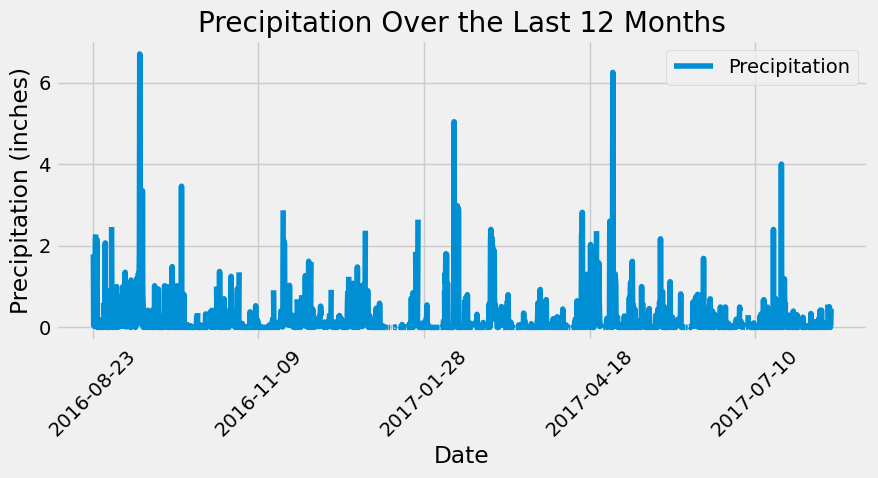

In [57]:
most_recent_date = dt.date(2017,8,23)

one_year_ago =  most_recent_date - dt.timedelta(days = 365)

precipitation_data = session.query(measurement.date, measurement.prcp).filter(measurement.date >= one_year_ago).all()

precipitation_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])

precipitation_df = precipitation_df.sort_values('Date')

precipitation_df.plot(x='Date', y='Precipitation', figsize=(9, 5))
plt.title("Precipitation Over the Last 12 Months")
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [51]:
precipitation_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [59]:
session.query(func.count(station.station)).all()


[(9,)]

In [60]:
active_station_lst = [measurement.station, func.count(measurement.station)]

active_station = session.query(*active_station_lst).group_by(measurement.station).\
                order_by(func.count(measurement.station).desc()).first().station

session.query(*active_station_lst).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [67]:
most_active_station_id = 'USC00519281'

temp_stats = session.query(
    func.min(measurement.tobs),
    func.max(measurement.tobs),
    func.avg(measurement.tobs)
).filter(measurement.station == most_active_station_id).all()

print(temp_stats)

[(54.0, 85.0, 71.66378066378067)]


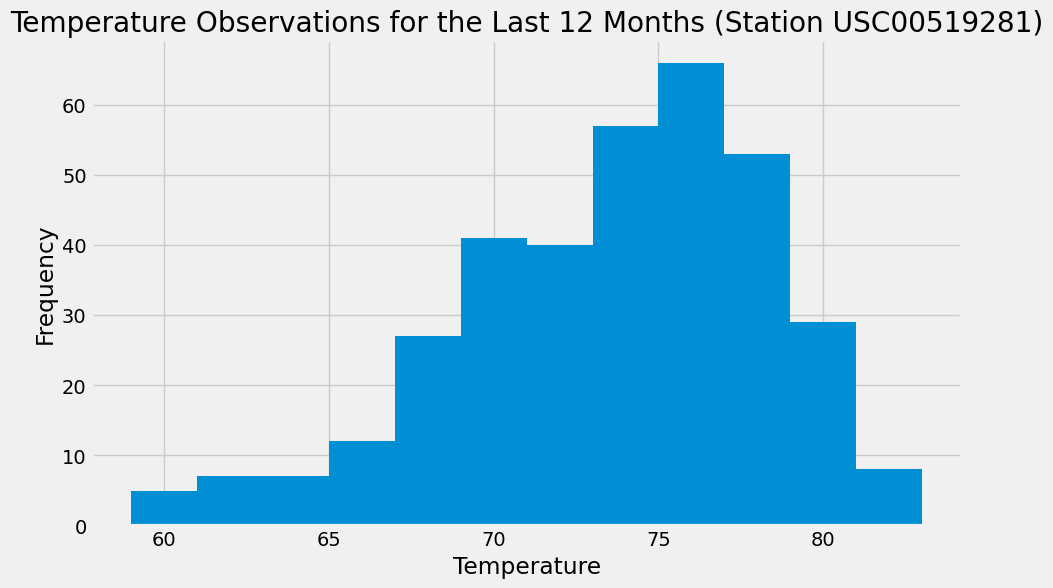

In [76]:
temperature_data = session.query(measurement.date, measurement.tobs).\
    filter(measurement.station == most_active_station_id).\
    filter(measurement.date >= one_year_ago).\
    order_by(measurement.date).all()

temperature_df = pd.DataFrame(temperature_data, columns=['date', 'tobs'])

plt.figure(figsize=(10, 6))
plt.hist(temperature_df['tobs'], bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Observations for the Last 12 Months (Station USC00519281)')
plt.show()

# Close Session

In [77]:
session.close()